In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131294 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import sys
sys.path.insert(0,'drive/Fast-Pytorch/Learning_Pytorch')
!ls drive

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import utils, models, transforms
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
from PIL import Image
import json

In [0]:
transform=transforms.Compose([transforms.Resize((224,224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])])

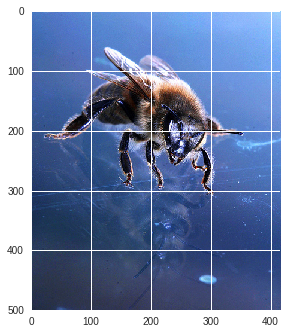

In [0]:
image1=Image.open('drive/Fast-Pytorch/Learning_Pytorch/datasets/hymenoptera_data/val/bees/2815838190_0a9889d995.jpg')
plt.imshow(image1)

In [0]:
vgg=models.vgg16(pretrained=True)
CUDA = torch.cuda.is_available()
if CUDA:
  vgg=vgg.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
553433881it [00:05, 94127845.17it/s]


In [0]:
image1=transform(image1)

In [0]:
print(image1.shape)

torch.Size([3, 224, 224])


In [0]:
image1=image1.unsqueeze(0)

In [0]:
image=Variable(image1)

In [0]:
if CUDA:
  image=image.cuda()

In [0]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [0]:
output=vgg(image)

In [0]:
print(output.shape)

torch.Size([1, 1000])


In [0]:
output=output.squeeze(0)

In [0]:
print(output.shape)

torch.Size([1000])


In [0]:
labels=json.load(open('drive/Fast-Pytorch/Learning_Pytorch/datasets/imagenet-class-index.json'))

In [0]:
labels

In [0]:
index=output.max(0)

In [0]:
print(index)
print(index[1].item())

(tensor(13.6427, grad_fn=<MaxBackward0>), tensor(309))
309


In [0]:
index=str(index[1].item())
label=labels[index][1]

In [0]:
print(label)

bee


In [0]:
module_list=list(vgg.features.modules())

In [0]:
#print(vgg.features)
print(module_list[0])
#print(module_list[1])
#print(module_list[2])
#module_list

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [0]:
outputs=[]
names=[]
for layer in module_list[1:]:
  image=layer(image)
  outputs.append(image)
  names.append(str(layer))

In [0]:
for feature_map in outputs:
  print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [0]:
processed=[]
for feature_map in outputs:
  feature_map=feature_map.squeeze(0)
  gray_scale=torch.sum(feature_map,0)
  gray_scale=gray_scale/feature_map.shape[0]
  processed.append(gray_scale.data.cpu().numpy())

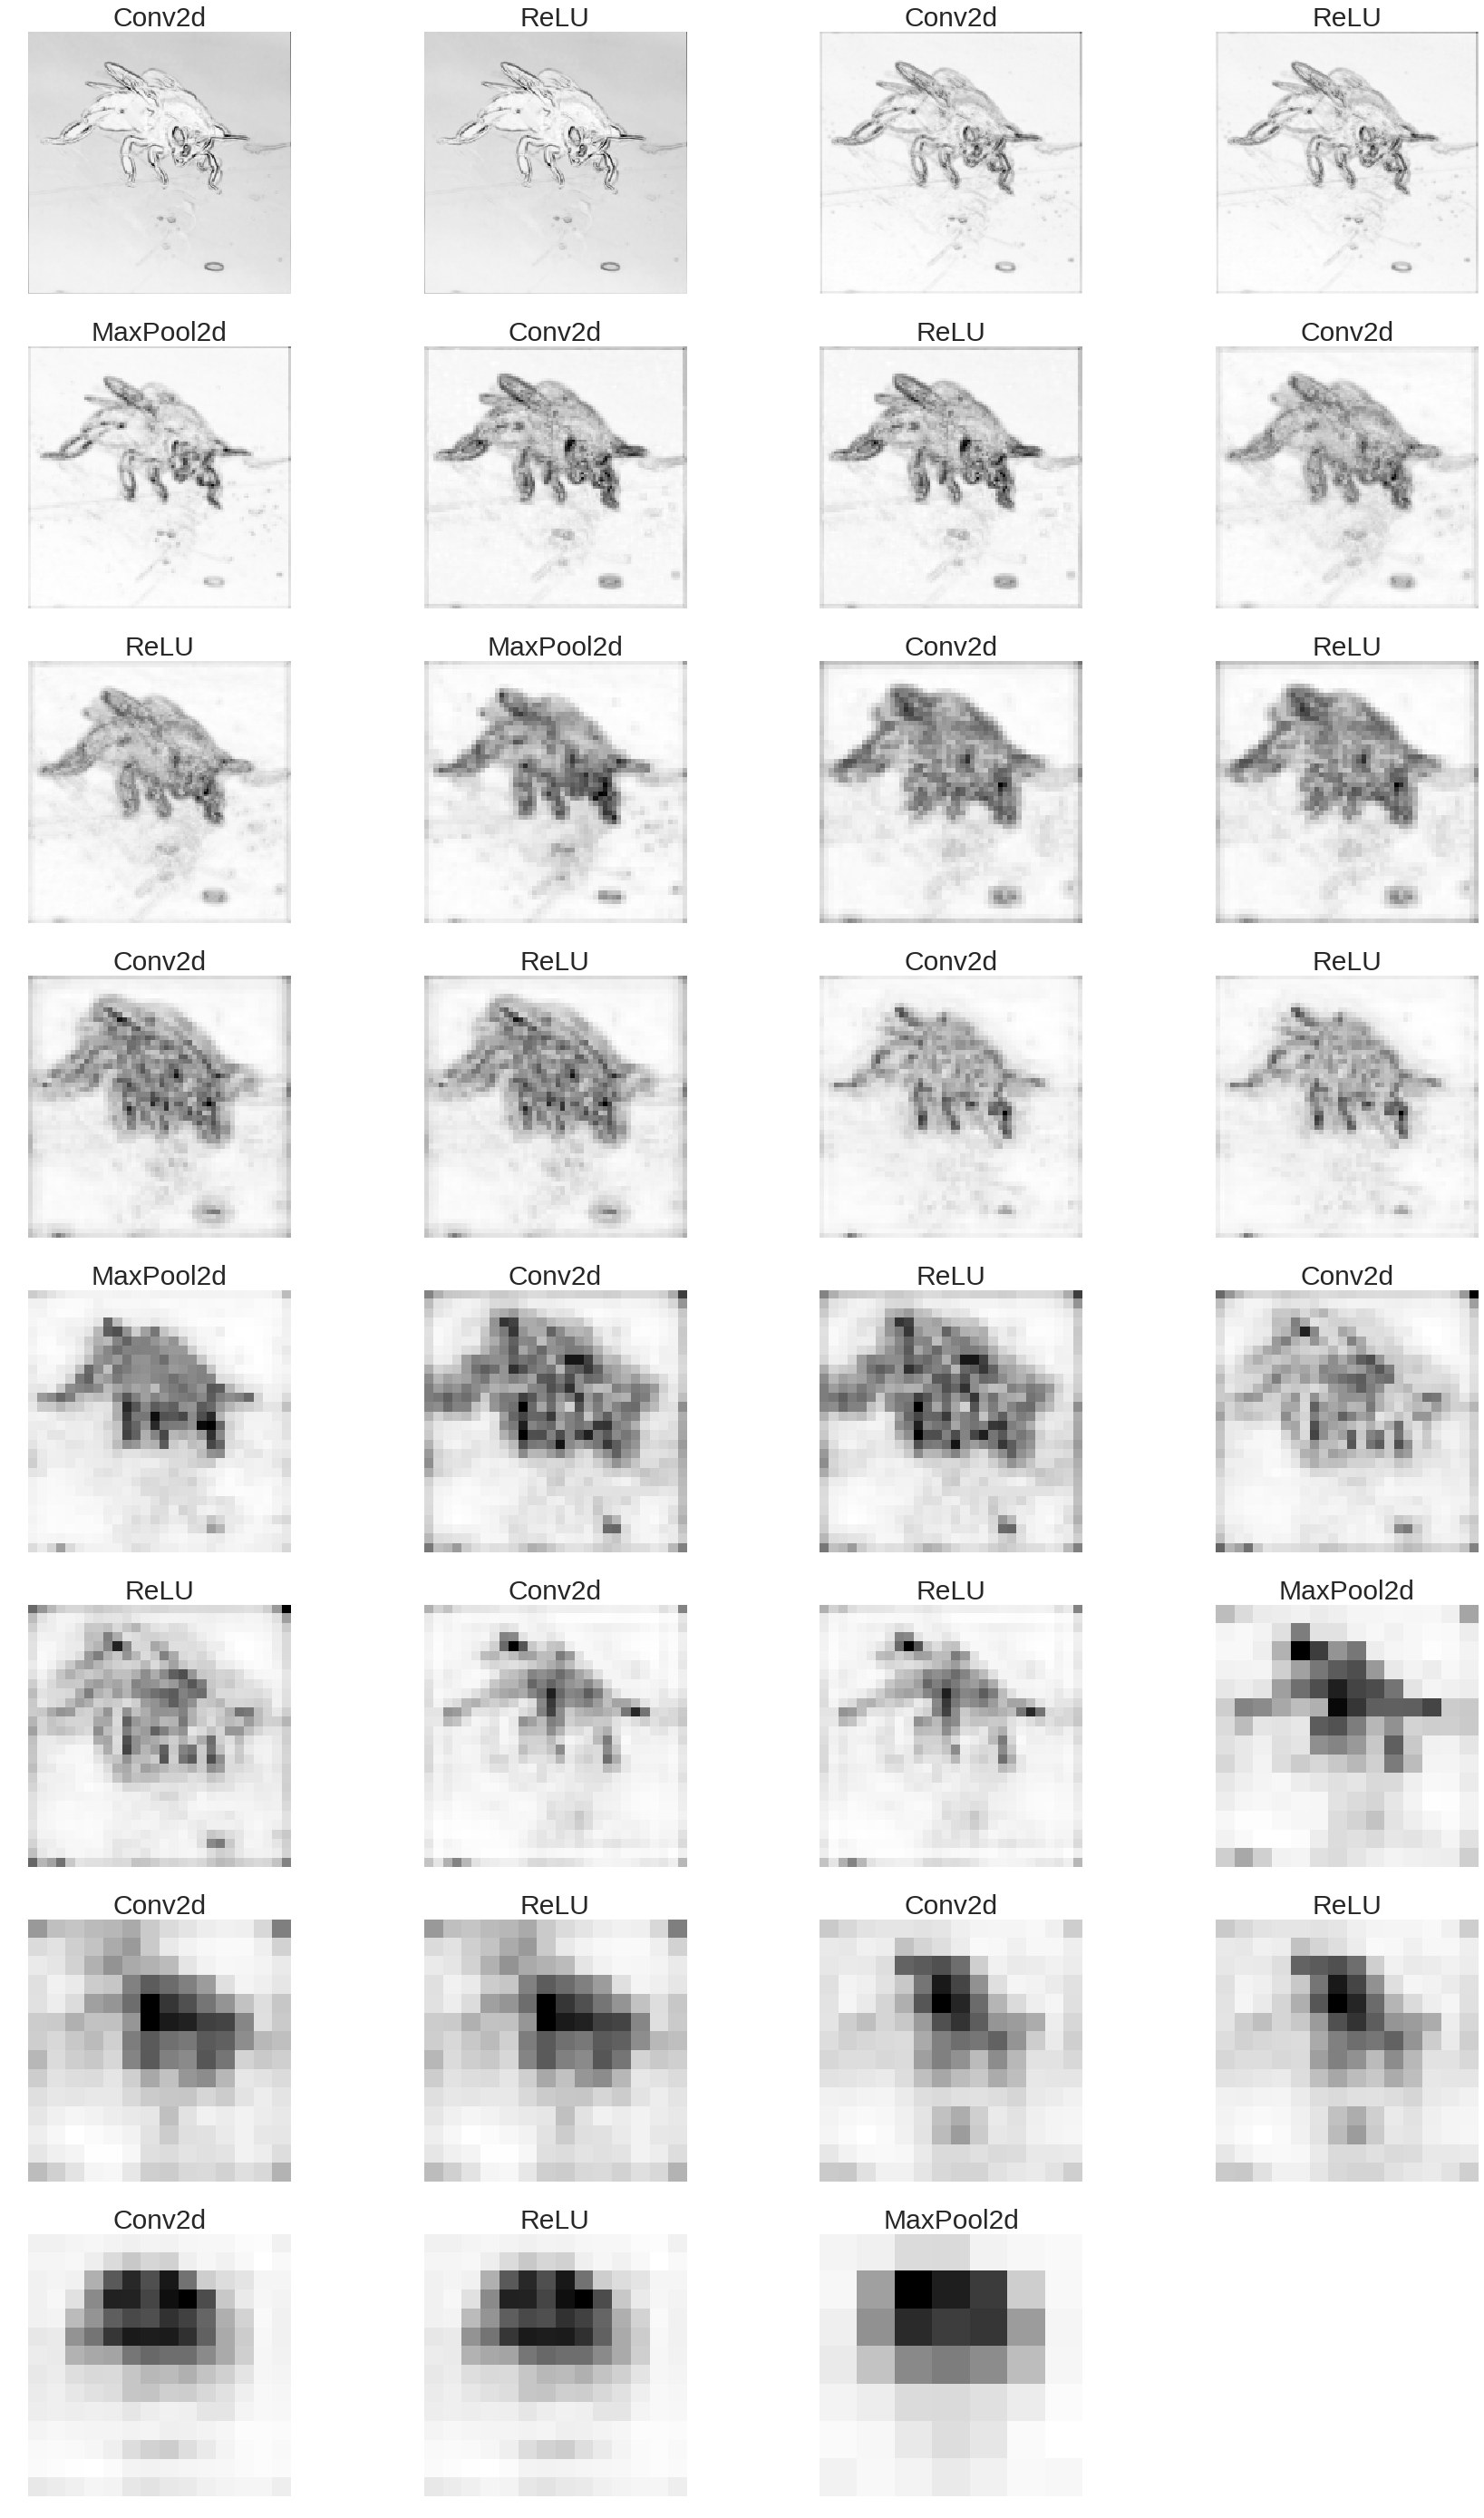

In [0]:
fig =plt.figure(figsize=(30,50))

for i in range(len(processed)):
  a=fig.add_subplot(8,4,i+1)
  imgplot=plt.imshow(processed[i])
  plt.axis('off')
  a.set_title(names[i].split('(')[0], fontsize=30)
  
plt.savefig('feature_maps.jpg', bbox_inches='tight')